In [1]:
#Importing common Lib
import selenium
import pandas as pd
import time
from bs4 import BeautifulSoup

#importing selenium web driver
from selenium import webdriver

#for press the enter
from selenium.webdriver.common.keys import Keys

# Importing required Exceptions which needs to handled
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

#Importing requests
import requests

# importing regex
import re

#for saving the image file
import urllib.request

#for the right click button
from selenium.webdriver import ActionChains

In [2]:
#importing the driver from the crome
driver=webdriver.Chrome(r'D:\Datatrained\Web Scrapping\chromedriver.exe')

#opening the webpage url
url=('https://www.cardekho.com/used-cars+in+maharashtra')
driver.get(url)
time.sleep(5)


#total_height = int(driver.execute_script("return document.body.scrollHeight"))
for i in range(1, 200000,15):
    driver.execute_script("window.scrollTo(0, {});".format(i))

time.sleep(5)

page_url=[]
p_url=driver.find_elements_by_xpath('//div[@class="gsc_col-xs-7 carsName"]//a')
for i in p_url:
    page_url.append(i.get_attribute('href'))
    
#Variable Declaration:
Car_Name=[]
#car_history=[]
car_driven=[]
yr_puchase=[]
car_owenr=[]
fuel_type=[]
transmission=[]
car_price=[]
    
for k in page_url:
    driver.get(k)
    time.sleep(3) 
    
    try:
        year=driver.find_element_by_xpath('/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[1]/div/div[2]')
        yr_puchase.append(year.text)
    except NoSuchElementException:
        yr_puchase.append('_')
            
    try:
        name=driver.find_element_by_xpath('//div[@class="gsc_col-xs-12"]//h1')
        Car_Name.append(name.text[5:])
    except NoSuchElementException:
        Car_Name.append('_')
 
    #fetching fuel data
    try:
        fuel=driver.find_element_by_xpath('/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[3]/div/div[2]')
        fuel_type.append(fuel.text)
    except NoSuchElementException:
        fuel_type.append('_')
        
     #fetching car driven data       
    try:
        driven=driver.find_element_by_xpath('/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[4]/div/div[2]')
        car_driven.append(driven.text[:5].replace(',',''))
    except NoSuchElementException:
        car_driven.append('_')  
        
       #fetching transmission data  
    try:
        trans=driver.find_element_by_xpath('/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[8]/div/div[2]')
        transmission.append(trans.text)
    except NoSuchElementException:
        transmission.append('_') 
        
      #fetching car owner data    
    try:
        owr=driver.find_element_by_xpath('/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[6]/div/div[2]')
        car_owenr.append(owr.text)
    except NoSuchElementException:
        car_owenr.append('_')    
    
     #fetching car price data
    try:
        price=driver.find_element_by_xpath('//div[@class="priceSection"]/span[2]')
        car_price.append(price.text.replace(',',''))
    except NoSuchElementException:
        car_price.append('_')
        
        
time.sleep(5)
#creating the dataframe
df1=pd.DataFrame({})
df1['Car Name']=Car_Name
df1['Year']=yr_puchase
df1['Fuel']=fuel_type 
df1['Car Driven']=car_driven  
df1['Transmission']=transmission  
df1['Owner']=car_owenr 
df1['price']=car_price  

#exporting data to csv
df1.to_csv('Car_Scrapping1.csv', index=False)

In [61]:
#importing the driver from the crome
driver=webdriver.Chrome(r'D:\Datatrained\Web Scrapping\chromedriver.exe')

#opening the webpage url
url=('https://www.olx.in/en/mumbai_g4058997/cars_c84')
driver.get(url)
time.sleep(5)
   
#loading whole page and click on load more
for i in range(1,15):
    last_height = driver.execute_script('return document.body.scrollHeight')
    while True:
        driver.execute_script('window.scrollTo(0,document.body.scrollHeight)')
        time.sleep(2)
        new_height = driver.execute_script('return document.body.scrollHeight')
        try:
            driver.find_element_by_xpath('//button[@class="rui-39-wj rui-3evoE rui-1JPTg"]').click()
            time.sleep(2)
        except:
            pass
        if new_height == last_height:
            break
        last_height = new_height   

time.sleep(5)

#delcaring the varible
page_url=[]
Car_Name=[]
yr_puchase=[]
fuel_type=[]
car_price=[]
dataT=[]
car_drive=[]

#fetching the url
p_url=driver.find_elements_by_xpath('//li[@class="EIR5N"]//a')#EIR5N
for i in p_url:
    page_url.append(i.get_attribute('href'))   

#fetching car name data
price=driver.find_elements_by_xpath("//span[@class='_2TVI3']")
for i in name:
    if i.text is None :
        yr_puchase.append("__") 
        car_drive.append("__")
    else:
        yr_puchase.append(i.text[:4])
        car_drive.append(i.text[7:].replace(' km','').replace(',',''))
            
#fetching car price data            
price=driver.find_elements_by_xpath("//span[@class='_89yzn']")
for i in price:
    if i.text is None :
        car_price.append("__") 
    else:
        car_price.append(i.text.replace('₹ ','').replace(',','')) 
        
time.sleep(5)

#Variable Declaration:
Car_Name=[]
#car_history=[]
car_owenr=[]
fuel_type=[]
transmission=[]
    
for k in page_url:
    driver.get(k)
    time.sleep(3) 
    
    #fetching car name data
    try:
        name=driver.find_element_by_xpath("//div[@class='_35xN1']").text
        description=name.replace(" (","@@@")
        description= description.split("@@@")
        Car_Name.append(description[0])
    except NoSuchElementException :
        Car_Name.append("")        
 
   
    #fetching fuel data
    try:
        fuel=driver.find_element_by_xpath("//div[@class='_3qDp0'][1]")
        fuel_type.append(fuel.text)
    except NoSuchElementException:
        fuel_type.append('') 
        
    #fetching transmission data    
    try:
        trans=driver.find_element_by_xpath('//*[@id="container"]/main/div/div/div/div[6]/div[1]/div[1]/div[1]/div/div[4]/div[3]/div')
        transmission.append(trans.text)
    except NoSuchElementException:
        transmission.append('') 
    
    #fetching car owner data
    try:
        owr=driver.find_element_by_xpath("//div[@class='_1gasz'][1]")
        car_owenr.append(owr.text)
    except NoSuchElementException:
        car_owenr.append('')    

        
        
time.sleep(5)
#creating the dataframe
df2=pd.DataFrame({})
df2['Car Name']=Car_Name
df2['Year']=yr_puchase
df2['Fuel']=fuel_type 
df2['Car Driven']=car_drive  
df2['Transmission']=transmission  
df2['Owner']=car_owenr 
df2['price']=car_price  

#exporting data to csv
df2.to_csv('Car_Scrapping2.csv', index=False)

In [97]:
#importing the driver from the crome
driver=webdriver.Chrome(r'D:\Datatrained\Web Scrapping\chromedriver.exe')

#opening the webpage url
url=('https://www.olx.in/en/maharashtra_g2001163/cars_c84')
driver.get(url)
time.sleep(5)

#loading whole page and click on load more
for i in range(1,20):
    last_height = driver.execute_script('return document.body.scrollHeight')
    while True:
        driver.execute_script('window.scrollTo(0,document.body.scrollHeight)')
        time.sleep(2)
        new_height = driver.execute_script('return document.body.scrollHeight')
        try:
            driver.find_element_by_xpath('//button[@class="rui-39-wj rui-3evoE rui-1JPTg"]').click()
            time.sleep(2)
        except:
            pass
        if new_height == last_height:
            break
        last_height = new_height 

time.sleep(5)

#delcaring the varible
page_url=[]
Car_Name=[]
yr_puchase=[]
fuel_type=[]
car_price=[]
dataT=[]
car_drive=[]

#fetching the url
p_url=driver.find_elements_by_xpath('//li[@class="EIR5N"]//a')#EIR5N
for i in p_url:
    page_url.append(i.get_attribute('href'))   

#fetching car name data
price=driver.find_elements_by_xpath("//span[@class='_2TVI3']")
for i in name:
    if i.text is None :
        yr_puchase.append("__") 
        car_drive.append("__")
    else:
        yr_puchase.append(i.text[:4])
        car_drive.append(i.text[7:].replace(' km','').replace(',',''))
            
#fetching car price data            
price=driver.find_elements_by_xpath("//span[@class='_89yzn']")
for i in price:
    if i.text is None :
        car_price.append("__") 
    else:
        car_price.append(i.text.replace('₹ ','').replace(',','')) 
        
time.sleep(5)

#Variable Declaration:
Car_Name=[]
#car_history=[]
car_owenr=[]
fuel_type=[]
transmission=[]
    
for k in page_url:
    driver.get(k)
    time.sleep(3) 
    
    #fetching car name data
    try:
        name=driver.find_element_by_xpath("//div[@class='_35xN1']").text
        description=name.replace(" (","@@@")
        description= description.split("@@@")
        Car_Name.append(description[0])
    except NoSuchElementException :
        Car_Name.append("")        
 
   
    #fetching fuel data
    try:
        fuel=driver.find_element_by_xpath("//div[@class='_3qDp0'][1]")
        fuel_type.append(fuel.text)
    except NoSuchElementException:
        fuel_type.append('') 
        
    #fetching transmission data    
    try:
        trans=driver.find_element_by_xpath('//*[@id="container"]/main/div/div/div/div[6]/div[1]/div[1]/div[1]/div/div[4]/div[3]/div')
        transmission.append(trans.text)
    except NoSuchElementException:
        transmission.append('') 
    
    #fetching car owner data
    try:
        owr=driver.find_element_by_xpath("//div[@class='_1gasz'][1]")
        car_owenr.append(owr.text)
    except NoSuchElementException:
        car_owenr.append('')    
        
        
time.sleep(5)
#creating the dataframe
df3=pd.DataFrame({})
df3['Car Name']=Car_Name
df3['Year']=yr_puchase
df3['Fuel']=fuel_type 
df3['Car Driven']=car_drive  
df3['Transmission']=transmission  
df3['Owner']=car_owenr 
df3['price']=car_price  

#exporting data to csv
df3.to_csv('Car_Scrapping3.csv', index=False)        

In [114]:
#importing the driver from the crome
driver=webdriver.Chrome(r'D:\Datatrained\Web Scrapping\chromedriver.exe')

#opening the webpage url
url=('https://www.olx.in/bengaluru_g4058803/cars_c84/q-car')
driver.get(url)
time.sleep(5)


#loading whole page and click on load more
for i in range(1,15):
    last_height = driver.execute_script('return document.body.scrollHeight')
    while True:
        driver.execute_script('window.scrollTo(0,document.body.scrollHeight)')
        time.sleep(2)
        new_height = driver.execute_script('return document.body.scrollHeight')
        try:
            driver.find_element_by_xpath('//button[@class="rui-39-wj rui-3evoE rui-1JPTg"]').click()
            time.sleep(2)
        except:
            pass
        if new_height == last_height:
            break
        last_height = new_height 

time.sleep(5)

#delcaring the varible
page_url=[]
Car_Name=[]
yr_puchase=[]
fuel_type=[]
car_price=[]
dataT=[]
car_drive=[]

#fetching the url
p_url=driver.find_elements_by_xpath('//li[@class="EIR5N"]//a')#EIR5N
for i in p_url:
    page_url.append(i.get_attribute('href'))   

#fetching car name data
price=driver.find_elements_by_xpath("//span[@class='_2TVI3']")
for i in name:
    if i.text is None :
        yr_puchase.append("__") 
        car_drive.append("__")
    else:
        yr_puchase.append(i.text[:4])
        car_drive.append(i.text[7:].replace(' km','').replace(',',''))
            
#fetching car price data            
price=driver.find_elements_by_xpath("//span[@class='_89yzn']")
for i in price:
    if i.text is None :
        car_price.append("__") 
    else:
        car_price.append(i.text.replace('₹ ','').replace(',','')) 
        
time.sleep(5)

#Variable Declaration:
Car_Name=[]
#car_history=[]
car_owenr=[]
fuel_type=[]
transmission=[]
    
for k in page_url:
    driver.get(k)
    time.sleep(3) 
    
    #fetching car name data
    try:
        name=driver.find_element_by_xpath("//div[@class='_35xN1']").text
        description=name.replace(" (","@@@")
        description= description.split("@@@")
        Car_Name.append(description[0])
    except NoSuchElementException :
        Car_Name.append("")        
 
   
    #fetching fuel data
    try:
        fuel=driver.find_element_by_xpath("//div[@class='_3qDp0'][1]")
        fuel_type.append(fuel.text)
    except NoSuchElementException:
        fuel_type.append('') 
        
    #fetching transmission data    
    try:
        trans=driver.find_element_by_xpath('//*[@id="container"]/main/div/div/div/div[6]/div[1]/div[1]/div[1]/div/div[4]/div[3]/div')
        transmission.append(trans.text)
    except NoSuchElementException:
        transmission.append('') 
    
    #fetching car owner data
    try:
        owr=driver.find_element_by_xpath("//div[@class='_1gasz'][1]")
        car_owenr.append(owr.text)
    except NoSuchElementException:
        car_owenr.append('')    
        
        
time.sleep(5)
#creating the dataframe
df4=pd.DataFrame({})
df4['Car Name']=Car_Name
df4['Year']=yr_puchase
df4['Fuel']=fuel_type 
df4['Car Driven']=car_drive  
df4['Transmission']=transmission  
df4['Owner']=car_owenr 
df4['price']=car_price  

#exporting data to csv
df4.to_csv('Car_Scrapping4.csv', index=False)                        

In [147]:
#importing the driver from the crome
driver=webdriver.Chrome(r'D:\Datatrained\Web Scrapping\chromedriver.exe')

#opening the webpage url
url=('https://www.olx.in/tamil-nadu_g2001173/cars_c84')
driver.get(url)
time.sleep(5)

#loading whole page and click on load more
for i in range(1,20):
    last_height = driver.execute_script('return document.body.scrollHeight')
    while True:
        driver.execute_script('window.scrollTo(0,document.body.scrollHeight)')
        time.sleep(2)
        new_height = driver.execute_script('return document.body.scrollHeight')
        try:
            driver.find_element_by_xpath('//button[@class="rui-39-wj rui-3evoE rui-1JPTg"]').click()
            time.sleep(2)
        except:
            pass
        if new_height == last_height:
            break
        last_height = new_height    


#delcaring the varible
page_url=[]
Car_Name=[]
yr_puchase=[]
fuel_type=[]
car_price=[]
dataT=[]
car_drive=[]

#fetching the url
p_url=driver.find_elements_by_xpath('//li[@class="EIR5N"]//a')#EIR5N
for i in p_url:
    page_url.append(i.get_attribute('href'))   

#fetching car name data
price=driver.find_elements_by_xpath("//span[@class='_2TVI3']")
for i in name:
    if i.text is None :
        yr_puchase.append("__") 
        car_drive.append("__")
    else:
        yr_puchase.append(i.text[:4])
        car_drive.append(i.text[7:].replace(' km','').replace(',',''))
            
#fetching car price data            
price=driver.find_elements_by_xpath("//span[@class='_89yzn']")
for i in price:
    if i.text is None :
        car_price.append("__") 
    else:
        car_price.append(i.text.replace('₹ ','').replace(',','')) 
        
time.sleep(5)

#Variable Declaration:
Car_Name=[]
#car_history=[]
car_owenr=[]
fuel_type=[]
transmission=[]
    
for k in page_url:
    driver.get(k)
    time.sleep(3) 
    
    #fetching car name data
    try:
        name=driver.find_element_by_xpath("//div[@class='_35xN1']").text
        description=name.replace(" (","@@@")
        description= description.split("@@@")
        Car_Name.append(description[0])
    except NoSuchElementException :
        Car_Name.append("")        
 
   
    #fetching fuel data
    try:
        fuel=driver.find_element_by_xpath("//div[@class='_3qDp0'][1]")
        fuel_type.append(fuel.text)
    except NoSuchElementException:
        fuel_type.append('') 
        
    #fetching transmission data    
    try:
        trans=driver.find_element_by_xpath('//*[@id="container"]/main/div/div/div/div[6]/div[1]/div[1]/div[1]/div/div[4]/div[3]/div')
        transmission.append(trans.text)
    except NoSuchElementException:
        transmission.append('') 
    
    #fetching car owner data
    try:
        owr=driver.find_element_by_xpath("//div[@class='_1gasz'][1]")
        car_owenr.append(owr.text)
    except NoSuchElementException:
        car_owenr.append('')    

        
        
time.sleep(5)
#creating the dataframe
df5=pd.DataFrame({})
df5['Car Name']=Car_Name
df5['Year']=yr_puchase
df5['Fuel']=fuel_type 
df5['Car Driven']=car_drive  
df5['Transmission']=transmission  
df5['Owner']=car_owenr 
df5['price']=car_price  

#exporting data to csv
df5.to_csv('Car_Scrapping5.csv', index=False)                                

In [151]:
###

In [155]:
#importing the driver from the crome
driver=webdriver.Chrome(r'D:\Datatrained\Web Scrapping\chromedriver.exe')

#opening the webpage url
url=('https://www.olx.in/uttar-pradesh_g2001176/cars_c84')
driver.get(url)
time.sleep(5)


#loading whole page and click on load more
for i in range(1,20):
    last_height = driver.execute_script('return document.body.scrollHeight')
    while True:
        driver.execute_script('window.scrollTo(0,document.body.scrollHeight)')
        time.sleep(2)
        new_height = driver.execute_script('return document.body.scrollHeight')
        try:
            driver.find_element_by_xpath('//button[@class="rui-39-wj rui-3evoE rui-1JPTg"]').click()
            time.sleep(2)
        except:
            pass
        if new_height == last_height:
            break
        last_height = new_height    


#delcaring the varible
page_url=[]
Car_Name=[]
yr_puchase=[]
fuel_type=[]
car_price=[]
dataT=[]
car_drive=[]

#fetching the url
p_url=driver.find_elements_by_xpath('//li[@class="EIR5N"]//a')#EIR5N
for i in p_url:
    page_url.append(i.get_attribute('href'))   

#fetching car name data
price=driver.find_elements_by_xpath("//span[@class='_2TVI3']")
for i in name:
    if i.text is None :
        yr_puchase.append("__") 
        car_drive.append("__")
    else:
        yr_puchase.append(i.text[:4])
        car_drive.append(i.text[7:].replace(' km','').replace(',',''))
            
#fetching car price data            
price=driver.find_elements_by_xpath("//span[@class='_89yzn']")
for i in price:
    if i.text is None :
        car_price.append("__") 
    else:
        car_price.append(i.text.replace('₹ ','').replace(',','')) 
        
time.sleep(5)

#Variable Declaration:
Car_Name=[]
#car_history=[]
car_owenr=[]
fuel_type=[]
transmission=[]
    
for k in page_url:
    driver.get(k)
    time.sleep(3) 
    
    #fetching car name data
    try:
        name=driver.find_element_by_xpath("//div[@class='_35xN1']").text
        description=name.replace(" (","@@@")
        description= description.split("@@@")
        Car_Name.append(description[0])
    except NoSuchElementException :
        Car_Name.append("")        
 
   
    #fetching fuel data
    try:
        fuel=driver.find_element_by_xpath("//div[@class='_3qDp0'][1]")
        fuel_type.append(fuel.text)
    except NoSuchElementException:
        fuel_type.append('') 
        
    #fetching transmission data    
    try:
        trans=driver.find_element_by_xpath('//*[@id="container"]/main/div/div/div/div[6]/div[1]/div[1]/div[1]/div/div[4]/div[3]/div')
        transmission.append(trans.text)
    except NoSuchElementException:
        transmission.append('') 
    
    #fetching car owner data
    try:
        owr=driver.find_element_by_xpath("//div[@class='_1gasz'][1]")
        car_owenr.append(owr.text)
    except NoSuchElementException:
        car_owenr.append('')  

        
        
time.sleep(5)
#creating the dataframe
df6=pd.DataFrame({})
df6['Car Name']=Car_Name
df6['Year']=yr_puchase
df6['Fuel']=fuel_type 
df6['Car Driven']=car_drive  
df6['Transmission']=transmission  
df6['Owner']=car_owenr 
df6['price']=car_price  

#exporting data to csv
df6.to_csv('Car_Scrapping6.csv', index=False)                                        

In [164]:
#common lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Preprecessing Lib
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split

#outliars and skewness
from scipy import stats
from sklearn.preprocessing import power_transform

#multicoliniarity lib
from statsmodels.stats.outliers_influence import variance_inflation_factor

#model lib
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR

#Model Evaluation
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

#model cross validation
from sklearn.model_selection import cross_val_score


#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [292]:
#loading the test and train dataset
df1=pd.read_csv('Car_Scrapping1.csv')
df2=pd.read_csv('Car_Scrapping2.csv')
df3=pd.read_csv('Car_Scrapping3.csv')
df4=pd.read_csv('Car_Scrapping4.csv')
df5=pd.read_csv('Car_Scrapping5.csv')
df6=pd.read_csv('Car_Scrapping6.csv')

In [293]:
#concat the data frame into one
df=pd.concat([df1,df2,df3,df4,df5,df6],ignore_index=True)

In [194]:
df.head()

,Car Name,Year,Fuel,Car Driven,Transmission,Owner,price
0,Maruti Swift Dzire,2015,Petrol,2313,Manual,1st Owner,555000
1,Maruti Ertiga,2013,Petrol,8352,Manual,1st Owner,495000
2,Maruti Wagon R,2014,Petrol,8904,Manual,2nd Owner,308500
3,Maruti Alto 800,2018,Petrol,2013,Manual,1st Owner,350000
4,Ford Figo Aspire,2018,Petrol,1743,Manual,1st Owner,600000


In [168]:
#setting the option for the max rows
pd.set_option('display.max_rows',None)

In [195]:
df.shape
#there is 5271 rows and 7 columns is availble in the data

(5271, 7)

In [196]:
#checking the info of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car Name      5265 non-null   object
 1   Year          5271 non-null   int64 
 2   Fuel          5265 non-null   object
 3   Car Driven    5271 non-null   int64 
 4   Transmission  764 non-null    object
 5   Owner         5265 non-null   object
 6   price         5271 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 288.4+ KB


In [ ]:
#the dataframe having the object and int data types

In [197]:
df.describe()
#discribing the dataset

,Year,Car Driven,price
count,5271.000000,5271.000000,5.271000e+03
mean,2013.537279,58448.132802,6.274311e+05
std,4.723361,58317.321187,7.706418e+05
min,1900.000000,-110000.000000,1.500000e+04
25%,2011.000000,22688.000000,2.750000e+05
50%,2014.000000,56000.000000,4.450000e+05
75%,2017.000000,80000.000000,6.800000e+05
max,2021.000000,999999.000000,1.620000e+07


In [294]:
#checking the null values from dataframe
df.isna().sum()

Car Name           6
Year               0
Fuel               6
Car Driven         0
Transmission    4507
Owner              6
price              0
dtype: int64

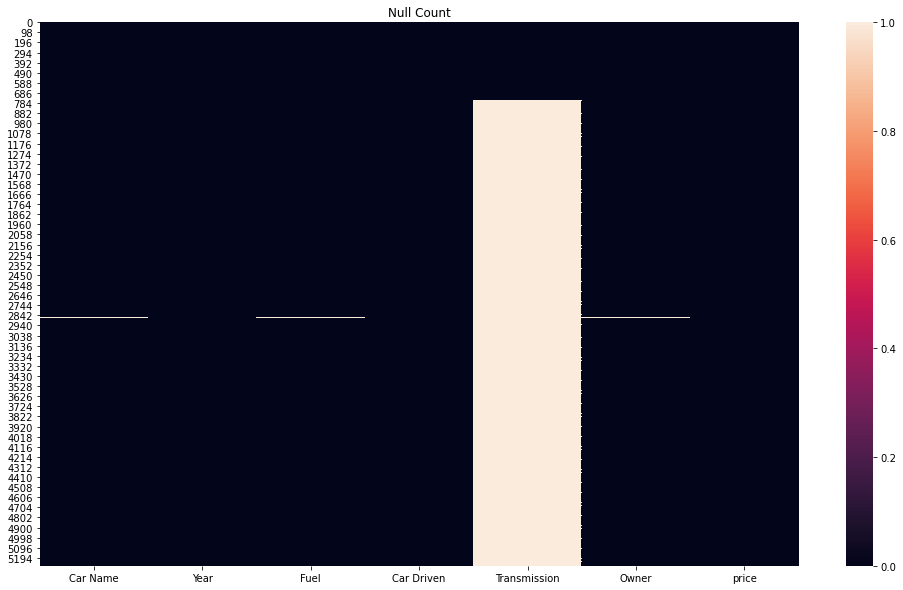

In [295]:
#plotting the heatmap to check the null values
plt.figure(figsize=(17,10))
sns.heatmap(df.isnull())
plt.title('Null Count')
plt.show()

In [199]:
df['Transmission'].value_counts()

Manual       577
Automatic    139
MH01          14
MH04          13
MH02           3
MH48           3
MH46           3
MH11           3
MH47           2
MH43           2
MH29           1
MH14           1
MH13           1
MH12           1
MH03           1
Name: Transmission, dtype: int64

In [ ]:
#Dropping the column Transmission as it has more than 50% null values.
df=df.drop(columns='Transmission',axis=1)

In [201]:
df.head()

,Car Name,Year,Fuel,Car Driven,Owner,price
0,Maruti Swift Dzire,2015,Petrol,2313,1st Owner,555000
1,Maruti Ertiga,2013,Petrol,8352,1st Owner,495000
2,Maruti Wagon R,2014,Petrol,8904,2nd Owner,308500
3,Maruti Alto 800,2018,Petrol,2013,1st Owner,350000
4,Ford Figo Aspire,2018,Petrol,1743,1st Owner,600000


In [205]:
#drop null value
df=df.dropna()

In [206]:
df.head()

,Car Name,Year,Fuel,Car Driven,Owner,price
0,Maruti Swift Dzire,2015,Petrol,2313,1st Owner,555000
1,Maruti Ertiga,2013,Petrol,8352,1st Owner,495000
2,Maruti Wagon R,2014,Petrol,8904,2nd Owner,308500
3,Maruti Alto 800,2018,Petrol,2013,1st Owner,350000
4,Ford Figo Aspire,2018,Petrol,1743,1st Owner,600000


In [207]:
#checking the null values from dataframe
df.isna().sum()

Car Name      0
Year          0
Fuel          0
Car Driven    0
Owner         0
price         0
dtype: int64

In [208]:
#Checking the value count for Car Name
df['Car Name'].value_counts()

Maruti Suzuki Swift                 215
Maruti Suzuki Swift Dzire           186
Maruti Suzuki Wagon R               136
Hyundai I10                         133
Maruti Wagon R                      128
Hyundai I20                         128
Honda City                          125
Toyota Innova                       113
Hyundai Verna                       106
Maruti Suzuki Ertiga                 93
Volkswagen Polo                      88
Maruti Suzuki Alto                   83
Hyundai Grand I10                    81
Mahindra Xuv500                      80
Ford Ecosport                        79
Mahindra Scorpio                     77
Hyundai i20                          74
Maruti Celerio                       73
Maruti Swift Dzire                   69
Hyundai Creta                        66
Ford Figo                            65
Volkswagen Vento                     63
Maruti Suzuki Alto K10               61
Hyundai Santro Xing                  59
Renault Duster                       59


In [210]:
#Checking the value count for Fuel
df['Fuel'].value_counts()

DIESEL                            2209
PETROL                            1970
Petrol                             596
CNG & HYBRIDS                      201
Diesel                             153
CNG                                 50
--                                  41
LPG                                 33
ELECTRIC                             8
PETROL/COMPRESSED NATURAL GAS        2
PETROL/LIQUIFIED PETROLEUM GAS       2
Name: Fuel, dtype: int64

In [212]:
#Checking the value count for Fuel
df['Owner'].value_counts()

1st          2460
2nd          1164
1st Owner     647
3rd           220
--            195
First         163
Second        139
2nd Owner     114
4th            66
Third          53
4+             28
Fourth         13
3rd Owner       3
Name: Owner, dtype: int64

In [219]:
#delete the -- data from the data frame
df.drop(df.loc[df['Owner'] == '--'].index, inplace=True)
df.drop(df.loc[df['Fuel'] == '--'].index, inplace=True)

In [222]:
#checking the shape again after dropping the -- values
df.shape

(5048, 6)

In [223]:
#Checking the value count for Fuel
df['Fuel'].value_counts()

DIESEL                            2142
PETROL                            1865
Petrol                             596
CNG & HYBRIDS                      198
Diesel                             153
CNG                                 50
LPG                                 32
ELECTRIC                             8
PETROL/LIQUIFIED PETROLEUM GAS       2
PETROL/COMPRESSED NATURAL GAS        2
Name: Fuel, dtype: int64

In [224]:
#replacing the values from the columns
df['Fuel']=df['Fuel'].replace('Petrol','PETROL')
df['Fuel']=df['Fuel'].replace('Diesel','DIESEL')

In [225]:
#Checking the value count for Fuel
df['Fuel'].value_counts()

PETROL                            2461
DIESEL                            2295
CNG & HYBRIDS                      198
CNG                                 50
LPG                                 32
ELECTRIC                             8
PETROL/LIQUIFIED PETROLEUM GAS       2
PETROL/COMPRESSED NATURAL GAS        2
Name: Fuel, dtype: int64

In [226]:
#Checking the value count for Fuel
df['Owner'].value_counts()

1st          2447
2nd          1158
1st Owner     647
3rd           218
First         163
Second        139
2nd Owner     114
4th            66
Third          53
4+             27
Fourth         13
3rd Owner       3
Name: Owner, dtype: int64

In [227]:
#replacing the values from the columns
df['Owner']=df['Owner'].replace('1st Owner','1st')
df['Owner']=df['Owner'].replace('First','1st')
df['Owner']=df['Owner'].replace('Second','2nd')
df['Owner']=df['Owner'].replace('2nd Owner','2nd')
df['Owner']=df['Owner'].replace('Third','3rd')
df['Owner']=df['Owner'].replace('3rd Owner','3rd')
df['Owner']=df['Owner'].replace('Fourth','4th')

In [228]:
#Checking the value count for Fuel
df['Owner'].value_counts()

1st    3257
2nd    1411
3rd     274
4th      79
4+       27
Name: Owner, dtype: int64

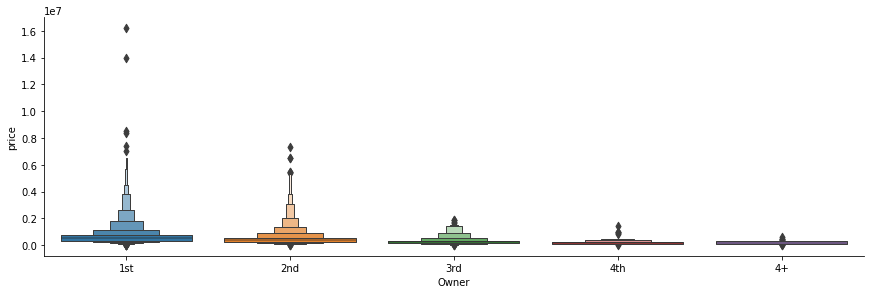

In [229]:
#plotting the graph Owner vs price
sns.catplot(y='price',x='Owner',data=df.sort_values('price',ascending=False),kind='boxen',height=4,aspect=3)
plt.show()

In [ ]:
#From the catplot it is clearly seen that the highhest car price is for 1st owner.

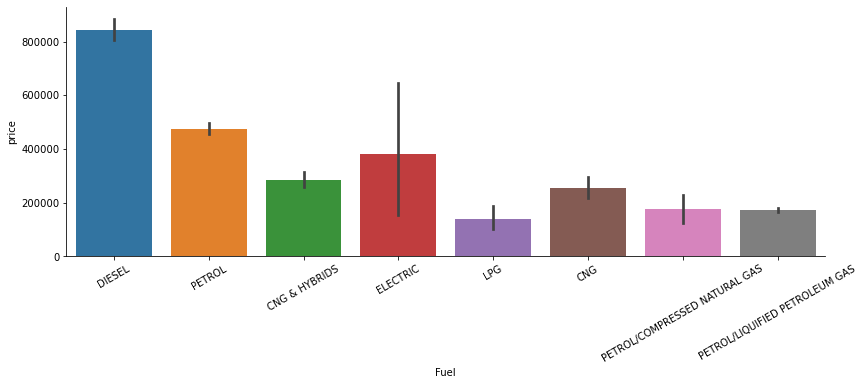

In [233]:
#plotting the graph Owner vs Fuel
sns.catplot(y='price',x='Fuel',data=df.sort_values('price',ascending=False),kind='bar',height=4,aspect=3)
plt.xticks(rotation=30)
plt.show()

In [ ]:
#From the catplot it is clearly seen that the highest car price is for Diesel car.

In [234]:
#eccoding the categorical data 
df=pd.get_dummies(df,columns=['Car Name','Fuel','Owner'])
df.head()

,Year,Car Driven,price,Car Name_Ashok Leyland Others,Car Name_Ashok Leyland Stile,Car Name_Aston Martin V8 Vantage,Car Name_Audi A3,Car Name_Audi A4,Car Name_Audi A6,Car Name_Audi A8,...,Fuel_ELECTRIC,Fuel_LPG,Fuel_PETROL,Fuel_PETROL/COMPRESSED NATURAL GAS,Fuel_PETROL/LIQUIFIED PETROLEUM GAS,Owner_1st,Owner_2nd,Owner_3rd,Owner_4+,Owner_4th
0,2015,2313,555000,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,2013,8352,495000,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,2014,8904,308500,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,2018,2013,350000,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,2018,1743,600000,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


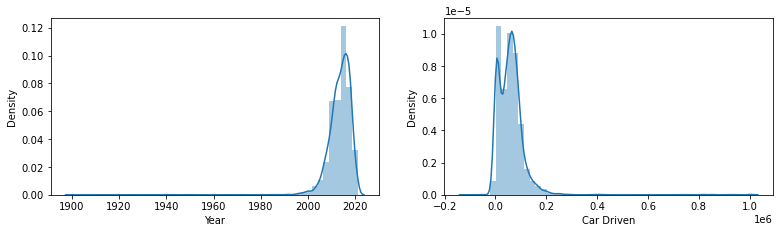

In [237]:
#ploting the distribition plot to check the data distribution
plt.figure(figsize=(20,15),facecolor='white')
pltnum=1

for column in df.iloc[:,:2]:
    if pltnum <= 30:
        plt.subplot(4,3,pltnum)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show()    

In [ ]:
#there is outliers is looks at all the features  

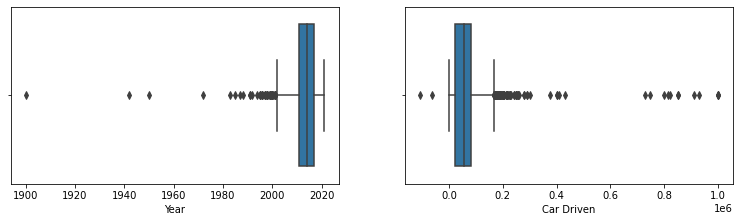

In [238]:
#ploting the distribition plot to check the data distribution
plt.figure(figsize=(20,15),facecolor='white')
pltnum=1

for column in df.iloc[:,:2]:
    if pltnum <= 30:
        plt.subplot(4,3,pltnum)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show()    

In [ ]:
#it is clearly visible from boxplot that all the features having outliers.

In [261]:
#Using z-score to remove the outliers
z=np.abs(stats.zscore(df.iloc[:,:2]))

In [262]:
index=np.where(z > 3)[0]

In [263]:
#dropping the outliers from the data frame
df=df.drop(df.index[index])

In [264]:
df.shape

(4972, 363)

In [265]:
#Data Loss
loss_percentage=(5048-4972)/5048*100
print(loss_percentage)

1.5055467511885896


In [267]:
#checking the skewness and the features and target relation
df_corr=df.iloc[:,:3].abs().corr()
df_corr['price'].sort_values(ascending=False)

price         1.000000
Year          0.345956
Car Driven   -0.094271
Name: price, dtype: float64

In [ ]:
#there is no skewness in the features as the range is in between -0.5 to +0.5.

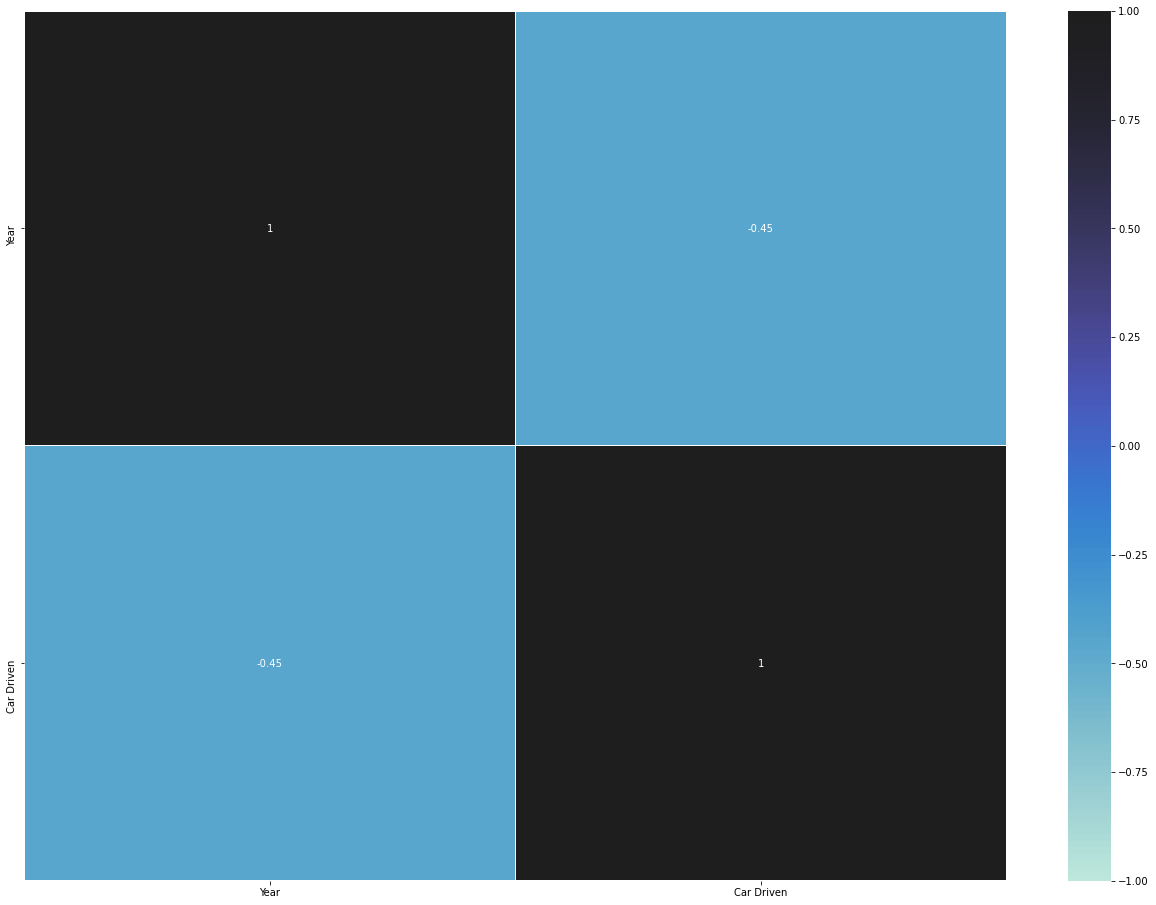

In [268]:
#using the heatmap to check the correlation between features.
corr_matrix=df.iloc[:,:2].abs().corr()

plt.figure(figsize=(22,16))

sns.heatmap(corr_matrix,vmin=-1,vmax=1,center=True,annot=True, fmt='.2g',linewidths=0.1)
plt.show()

In [ ]:
#there is multicolliniarity issue looks in the multiple features having multicolliniarity issue.
#Checking the same with the variance inflection factor.

In [269]:
scalar=StandardScaler()
x_data=scalar.fit_transform(df.iloc[:,:2])

In [271]:
df.iloc[:,:2]=x_data
df.head()

,Year,Car Driven,price,Car Name_Ashok Leyland Others,Car Name_Ashok Leyland Stile,Car Name_Aston Martin V8 Vantage,Car Name_Audi A3,Car Name_Audi A4,Car Name_Audi A6,Car Name_Audi A8,...,Fuel_ELECTRIC,Fuel_LPG,Fuel_PETROL,Fuel_PETROL/COMPRESSED NATURAL GAS,Fuel_PETROL/LIQUIFIED PETROLEUM GAS,Owner_1st,Owner_2nd,Owner_3rd,Owner_4+,Owner_4th
0,0.331828,-1.323622,555000,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,-0.181504,-1.174470,495000,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0.075162,-1.160837,308500,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1.101825,-1.331032,350000,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1.101825,-1.337700,600000,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [272]:
#seprating the features and target
x=df.drop(columns='price')
y=df['price']

In [273]:
#Finding best Random State:
maxAcc=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc_r2=r2_score(y_test,y_pred)
    if acc_r2 > maxAcc:
        maxAcc=acc_r2
        maxRs=i
        
print(f"Best Accuracy(Next_Tmax) is : {maxAcc* 100:.2f}%")
print("The Best Random State(Next_Tmax) is :",maxRs)     

Best Accuracy(Next_Tmax) is : 77.44%
The Best Random State(Next_Tmax) is : 19


In [274]:
#seprating the train and test datasets with the best find random state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=19)

In [275]:
#model Evaluation for LR:
print('\n==========Model Evaluaton and Accuracy check using LinearRegression===========')
lr=LinearRegression()
lr.fit(x_train,y_train)
y_predlr=lr.predict(x_test)
print(f"The accuracy of the model using LinearRegression is: {r2_score(y_test,y_predlr)*100:.2f}%\n")



#model Evaluation for KNN:
print('\n==========Model Evaluaton and Accuracy check using KNeighborsRegressor===========')
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_predknn=knn.predict(x_test)
print(f"The accuracy of the model for using KNeighborsRegressor is: {r2_score(y_test,y_predknn)*100:.2f}%\n")



#model Evaluation for RandomForestRegressor:
print('\n==========Model Evaluaton and Accuracy check using RandomForestRegressor===========')
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_predrfr=rfr.predict(x_test)
print(f"The accuracy of the model using RandomForestRegressor is: {r2_score(y_test,y_predrfr)*100:.2f}%\n")



#model Evaluation for AdaBoostRegressor:
print('\n==========Model Evaluaton and Accuracy check using AdaBoostRegressor===========')
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
y_predada=ada.predict(x_test)
print(f"The accuracy of the model for using AdaBoostRegressor is: {r2_score(y_test,y_predada)*100:.2f}%\n")



#model Evaluation for SVR:
print('\n===============Model Evaluaton and Accuracy check using SVR====================')
svr=SVR()
svr.fit(x_train,y_train)
y_predsvr=svr.predict(x_test)
print(f"The accuracy of the model for using SVR is: {r2_score(y_test,y_predsvr)*100:.2f}%\n")


==========Model Evaluaton and Accuracy check using LinearRegression===========
The accuracy of the model using LinearRegression is: 77.44%


==========Model Evaluaton and Accuracy check using KNeighborsRegressor===========
The accuracy of the model for using KNeighborsRegressor is: 60.99%


==========Model Evaluaton and Accuracy check using RandomForestRegressor===========
The accuracy of the model using RandomForestRegressor is: 79.43%


==========Model Evaluaton and Accuracy check using AdaBoostRegressor===========
The accuracy of the model for using AdaBoostRegressor is: -234.97%


===============Model Evaluaton and Accuracy check using SVR====================
The accuracy of the model for using SVR is: -6.33%



In [276]:
print('\n=============Cross Validation Score of Linear Reggression==============')
cvs_lr=cross_val_score(lr,x,y,cv=5)
print(f"Cross validation for the Linear Reggression is: {cvs_lr.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of KNeighborsRegressor==============')
cvs_knn=cross_val_score(knn,x,y,cv=5)
print(f"Cross validation for the KNeighborsRegressor is: {cvs_knn.mean()*100:.2f}%\n")

print('\n==========Cross Validation Score of Random Forest Regressor===========')
cvs_rfr=cross_val_score(rfr,x,y,cv=5)
print(f"Cross validation for the Random Forest Regressor is: {cvs_rfr.mean()*100:.2f}%\n")

print('\n============Cross Validation Score of AdaBoostRegressor===================')
cvs_ada=cross_val_score(ada,x,y,cv=5)
print(f"Cross validation for the AdaBoostRegressor is: {cvs_ada.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of SVR========================')
cvs_svr=cross_val_score(svr,x,y,cv=5)
print(f"Cross validation for the SVR Classifier is: {cvs_svr.mean()*100:.2f}%\n")


=============Cross Validation Score of Linear Reggression==============
Cross validation for the Linear Reggression is: -17947804193363563905024.00%


=============Cross Validation Score of KNeighborsRegressor==============
Cross validation for the KNeighborsRegressor is: 15.23%


==========Cross Validation Score of Random Forest Regressor===========
Cross validation for the Random Forest Regressor is: 54.22%


============Cross Validation Score of AdaBoostRegressor===================
Cross validation for the AdaBoostRegressor is: -167.22%


===================Cross Validation Score of SVR========================
Cross validation for the SVR Classifier is: -7.16%



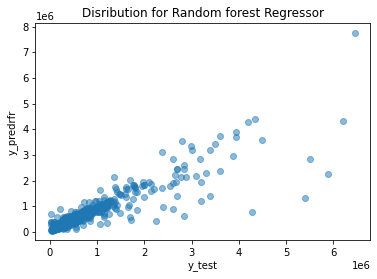

In [277]:
#checking distribution for the Random forest Regressor
plt.scatter(y_test, y_predrfr, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_predrfr")
plt.title("Disribution for Random forest Regressor")
plt.show()

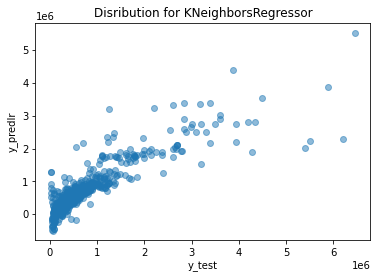

In [278]:
#checking distribution for the Linier Reggression
plt.scatter(y_test, y_predlr, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_predlr")
plt.title("Disribution for KNeighborsRegressor")
plt.show()

In [ ]:
#Here We select a the random forest reggressior as a best model and selecting for the hyper parameter tuning.

In [279]:
#Now Appling the gridsearchcv beofore building the model to check the best parameter.
best_param={'n_estimators':[80,90,100],
           'max_depth':[10,12,15],
           'min_samples_split':[2,3,5],
           'min_samples_leaf':[2,4,6]}

In [280]:
gridcv=GridSearchCV(rfr,param_grid=best_param)

In [281]:
gridcv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 12, 15],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [80, 90, 100]})

In [282]:
gridcv.best_params_

{'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 90}

In [287]:
#model Evaluation for RandomForestRegressor:
rfr=RandomForestRegressor(max_depth=15,min_samples_leaf=2,min_samples_split=5,n_estimators=90)
rfr.fit(x_train,y_train)

y_predrfr=rfr.predict(x_test)

#accuracy_scorelr=r2_score(y_test,y_predlr)
print(f"The accuracy of the model using RandomForestRegressor is: {r2_score(y_test,y_predrfr)*100:.2f}%\n")

The accuracy of the model using RandomForestRegressor is: 55.73%



In [ ]:
#After the hyper parameter tuning on RandomForestRegressor the r2_score is not increesed.

In [288]:
#model Evaluation for RandomForestRegressor:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

y_predrfr=rfr.predict(x_test)

#accuracy_scorelr=r2_score(y_test,y_predlr)
print(f"The accuracy of the model using RandomForestRegressor is: {r2_score(y_test,y_predrfr)*100:.2f}%\n")

The accuracy of the model using RandomForestRegressor is: 78.90%



In [290]:
#importing the joblib to save the model
import joblib

In [291]:
joblib.dump(rfr,'carprice_pridiction_model.pkl')

['carprice_pridiction_model.pkl']

In [ ]:
#this complete the model buliding.